# Genetic Algorithm

### The "flow" of the genetic algorithm is as follows:

### 1. Generate a population of random solutions
### 2. Evaluate the fitness of each solution
### 3. Select the mating pool
### 4. Select parents from the mating pool
### 5. Mating (crossover and mutation)
### 6. Generate offspring
### 7. Repeat steps 1-6 until the population has converged

### For example, there are different types of representations for genes such as binary, decimal, integer, and others. Each type is treated differently. There are different types of mutation such as bit flip, swap, inverse, uniform, non-uniform, Gaussian, shrink, and others. Also, crossover has different types such as blend, one point, two points, uniform, and others. This tutorial will not implement all of them but just implements one type of each step involved in GA.

### We start by presenting the equation that we are going to implement:

$$Y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6$$

### The equation has 6 inputs (x1 to x6) and 6 weights (w1 to w6) as shown and the input values are (x1,x2,x3,x4,x5,x6)=(4,-2,7,5,-11,1). We are looking to find the parameters (weights) that maximize such equation. The idea of maximizing such equation seems simple. The positive input is to be multiplied by the largest possible positive number and the negative number is to be multiplied by the smallest possible negative number. But the idea we are looking to implement is how to make GA do that on its own in order to know that it is better to use positive weight with positive inputs and negative weights with negative inputs. Let us start implementing the GA.

# Define the problem

In [1]:
# Inputs of the equation.
equation_inputs = [4,-2,7,5,-11,1]
#equation_inputs = [1,-1,1,1,-1,1]
# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

# Define the initial population

### The next step is to define the initial population. Based on the number of weights, each chromosome (solution or individual) in the population will definitely have 6 genes, one gene for each weight. But the question is how many solutions per the population? There is no fixed value for that and we can select the value that fits well with our problem. But we could leave it generic so that it can be changed in the code. Next, we create a variable that holds the number of solutions per population, another to hold the size of the population, and finally, a variable that holds the actual initial population:

In [2]:
import numpy as np

sol_per_pop = 100
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.



### After preparing the population, next is to follow the flow above. Based on the fitness function, we are going to select the best individuals within the current population as parents for mating. 

### Next is to apply the GA variants (crossover and mutation) to produce the offspring of the next generation, creating the new population by appending both parents and offspring, and repeating such steps for a number of iterations/generations. 

### The next code applies these steps:

Original Population
[[ 493.81545541  156.8888161  -302.11516495 -199.97942162  204.15231951
  -157.90627542]
 [ 227.2410721   453.64438283 -404.83517376  490.54539369  257.99535301
  -324.49135551]
 [ 467.91817168 -373.57232662 -455.15153303  304.40273148  155.44750602
  -225.0305545 ]
 [ 120.41808581 -300.61899879 -270.70571035  320.38052169  286.75487788
   456.20584438]
 [-347.92126515 -420.04074119  -35.7945346   -78.18861646  -52.73093813
    11.58041968]
 [-299.56237479  420.81912336  406.52820532  244.07369883 -337.72645523
  -266.77235968]
 [ 428.4459538  -421.10588694  -68.32418952 -431.41173754 -362.50475077
  -162.13588498]
 [  70.1510133   464.81042494   32.96469449 -316.81385258  236.65881913
    22.4309905 ]
 [ -76.23833524 -171.60199681 -344.03439849 -146.14954222  476.71567137
   -50.18010085]
 [-399.50357789  343.15515171  103.20154468   43.66958487 -146.30823732
    -9.65904209]
 [-322.74732459 -136.54273777  286.22940477 -123.44065355   41.01385458
   171.87917366]
 

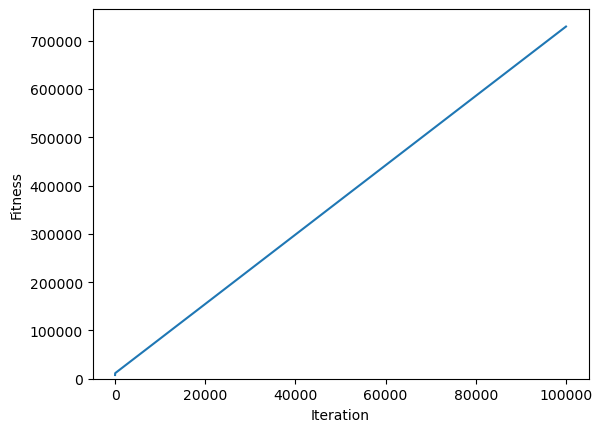

In [3]:
import ga as ga

best_outputs = []
num_generations = 100000
print_output = False

#Creating the initial population.
new_population = np.random.uniform(low=-500.0, high=500.0, size=pop_size)

print("Original Population")
print(new_population)

for generation in range(num_generations):
    if (print_output):
        print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    if (print_output):
        print("Fitness : ", fitness)

    best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    if (print_output):
        print("Best result : ", np.max(np.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    if (print_output):
        print("Parents")
        print(parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    if (print_output):
        print("Crossover")
        print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = ga.mutation(offspring_crossover, num_mutations=2)
    if (print_output):
        print("Mutation")
        print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
    # Print new population
    if (print_output):
        print("New Population")
        print(new_population)


print("Final Population")
print(new_population)

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.ylim(0)
matplotlib.pyplot.show()

